In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [ ]:
## Load the data
# Load the data from CSV files
# Note: Replace the file names with the actual paths to your CSV files
df1 = pd.read_csv("coin_gecko_2022-03-16.csv")
df2 = pd.read_csv("coin_gecko_2022-03-17.csv")
df = pd.concat([df1, df2], ignore_index=True)



CHECK OUTLIERS

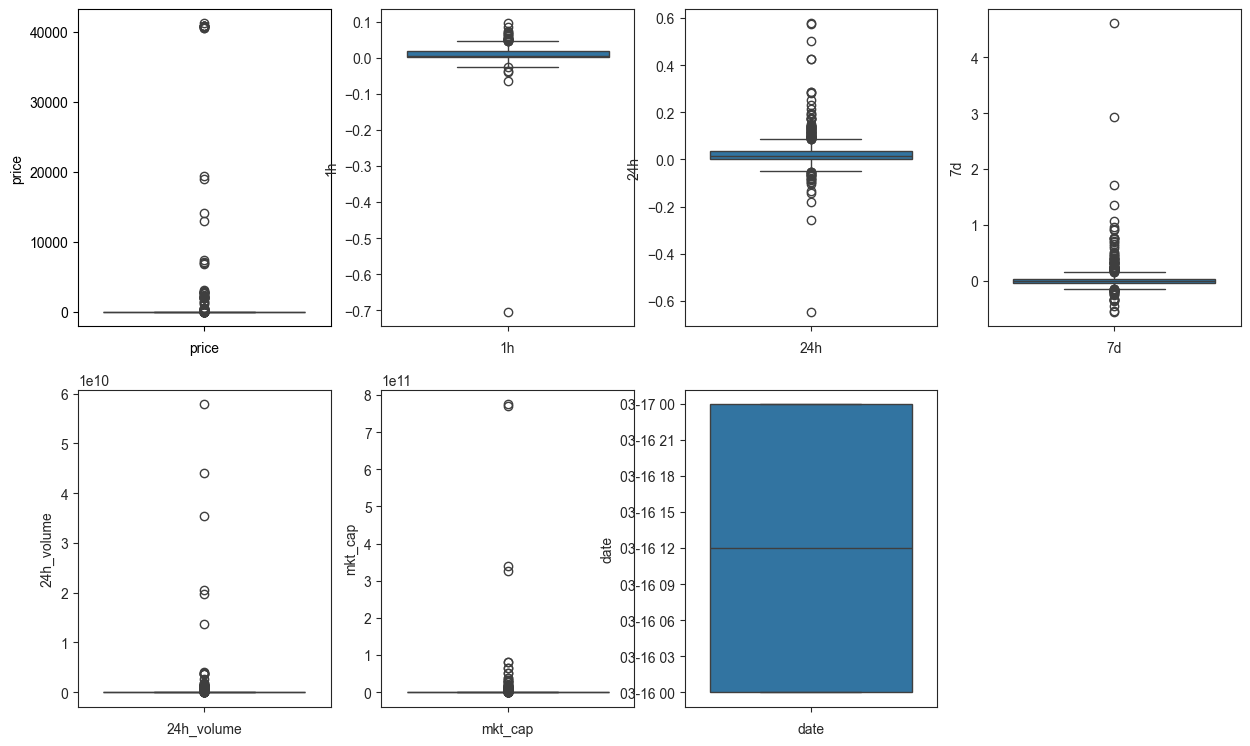

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
num_features = [features for features in df.columns if df[features].dtype != 'O']
plt.figure(figsize=(15,14))
for i in range(len(num_features)):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(num_features[i])
    px = sns.boxplot(df[num_features[i]])

Some Outliers are present in various columns such as    'price',
                                                        '1h', 
                                                        '24h', 
                                                        '7d', 
                                                        '24h_volume', 
                                                        'mkt_cap',
                                                        'Liquidity_Score'

In [9]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [14]:
#convert date column into datetime format and sort the dataframe by symbol and date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

In [15]:
df.isnull().sum() # Check for missing values
# Drop rows with missing values

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

we can see there is various columns have null values 

replace it using mean and  median

In [18]:
df['1h'].fillna(df['1h'].median(), inplace=True)
df['24h'].fillna(df['24h'].mean(), inplace=True)
df['7d'].fillna(df['7d'].mean(), inplace=True)
df['24h_volume'].fillna(df['24h_volume'].median(), inplace=True)

In [19]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

FEATURE ENGINEERING 


In [22]:
df['mkt_cap_to_volume_ratio'] = df['mkt_cap'] / df['24h_volume']
df['price_change_7d'] = df['price'].pct_change(7)
df['price_change_24h'] = df['price'].pct_change(1)

In [23]:
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']
# df['liquidity_label'] = (df['mkt_cap_to_volume_ratio'] > 0.5).astype(int)
df['moving_average_mkt_cap_7d'] = df['mkt_cap'].rolling(window=7).mean()
df['std_dev_price_7d'] = df['price'].rolling(window=7).std()

In [30]:
df1 =df.drop(columns=['24h_volume','mkt_cap','7d','24h','1h'])



In [31]:
df1.isnull().sum() # Check for missing values

coin                         0
symbol                       0
price                        0
date                         0
mkt_cap_to_volume_ratio      0
price_change_7d              7
price_change_24h             1
liquidity_ratio              0
moving_average_mkt_cap_7d    6
std_dev_price_7d             6
dtype: int64

In [32]:
df1['price_change_7d'].fillna(df1['price_change_7d'].mean(), inplace=True)
df1['price_change_24h'].fillna(df1['price_change_24h'].mean(), inplace=True)
df1['std_dev_price_7d'].fillna(df1['std_dev_price_7d'].mean(), inplace=True)
df1['moving_average_mkt_cap_7d'].fillna(df1['moving_average_mkt_cap_7d'].mean(), inplace=True)

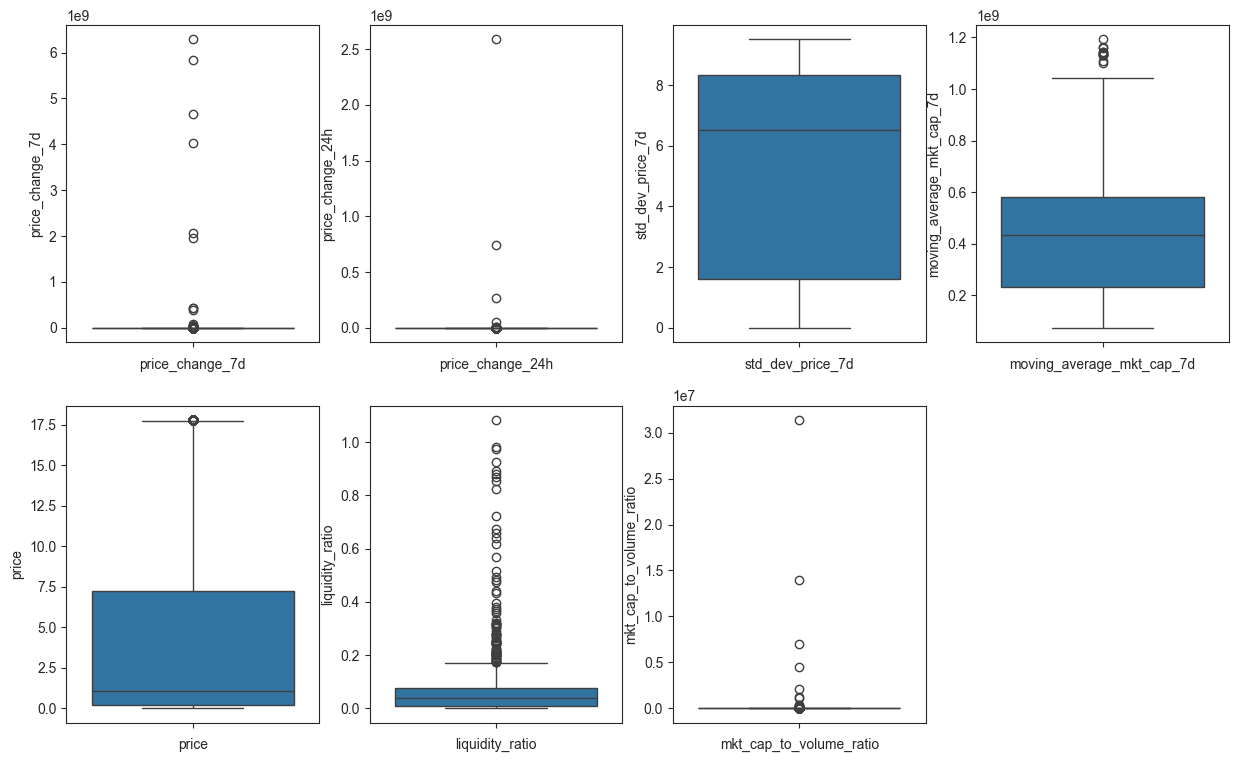

In [34]:
feature = ['price_change_7d','price_change_24h','std_dev_price_7d','moving_average_mkt_cap_7d','price','liquidity_ratio','mkt_cap_to_volume_ratio']
plt.figure(figsize=(15,14))
for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(feature[i])
    px = sns.boxplot(df1[feature[i]])

REPLACE THE OUTLIER VALUES BY UPPER AND LOWER LIMIT


In [36]:
outlier_features = ['price_change_7d','price_change_24h','moving_average_mkt_cap_7d','price','liquidity_ratio','mkt_cap_to_volume_ratio']

In [39]:
#Replace outliers with upper_limit and lower_limit
for col in outlier_features:
    per_25 = df1[col].quantile(0.25)
    per_75 = df1[col].quantile(0.75)
    IQR = per_75 - per_25
    upper_limit = per_75 + 1.5 * IQR
    lower_limit = per_25 - 1.5 * IQR 
    df1[col] = np.where(df1[col] > upper_limit, upper_limit, np.where(df1[col] < lower_limit, lower_limit, df1[col]))

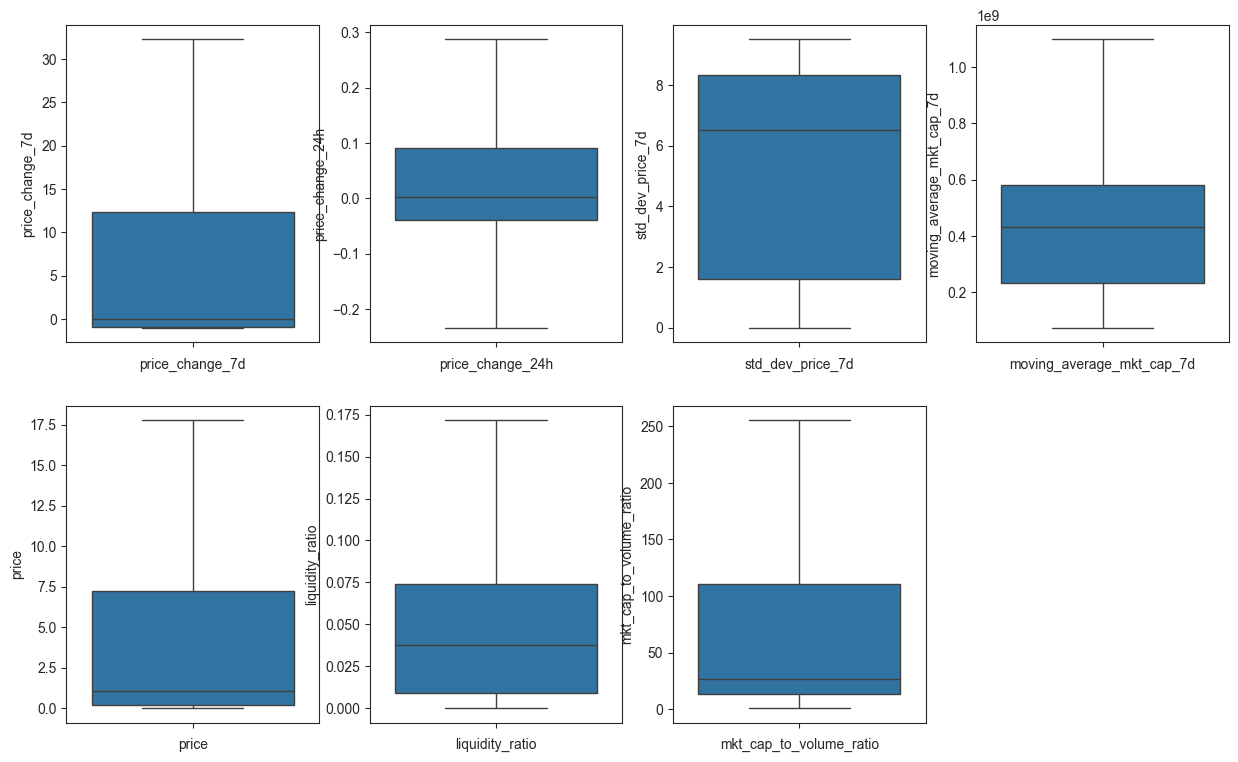

In [40]:
plt.figure(figsize=(15,14))
for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(feature[i])
    px = sns.boxplot(df1[feature[i]])

In [42]:
import os 
os.makedirs('dataframe', exist_ok=True)
df1.to_csv('dataframe/data.csv', index=False)

In [ ]:


# # Feature Engineering





# # Drop NaNs




x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42)



